In [ ]:
# Multilayer perceptron model

year
1980-01-01     21
1981-01-01     33
1982-01-01     44
1983-01-01    140
1984-01-01     35
Name: cases, dtype: int64


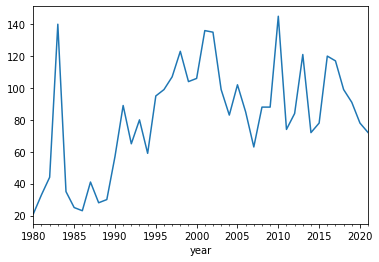

In [9]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
import pandas as pd

series = read_csv('belize_tb_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# load the dataset
dataframe = pd.read_csv('belize_tb_data.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

28 14


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
model.fit(trainX, trainY, epochs=10, batch_size=2, verbose=2)

Epoch 1/10
13/13 - 1s - loss: 5707.9473 - 531ms/epoch - 41ms/step
Epoch 2/10
13/13 - 0s - loss: 5532.0176 - 30ms/epoch - 2ms/step
Epoch 3/10
13/13 - 0s - loss: 5342.9639 - 0s/epoch - 0s/step
Epoch 4/10
13/13 - 0s - loss: 5158.2896 - 16ms/epoch - 1ms/step
Epoch 5/10
13/13 - 0s - loss: 4964.4976 - 19ms/epoch - 1ms/step
Epoch 6/10
13/13 - 0s - loss: 4768.3901 - 12ms/epoch - 885us/step
Epoch 7/10
13/13 - 0s - loss: 4584.7026 - 3ms/epoch - 224us/step
Epoch 8/10
13/13 - 0s - loss: 4370.7974 - 18ms/epoch - 1ms/step
Epoch 9/10
13/13 - 0s - loss: 4197.5894 - 13ms/epoch - 1ms/step
Epoch 10/10
13/13 - 0s - loss: 3985.3958 - 0s/epoch - 0s/step


In [16]:
# Errors

In [17]:
import math

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 3896.21 MSE (62.42 RMSE)
Test Score: 5053.53 MSE (71.09 RMSE)


In [18]:
# More error measures, Training Set Forecast Error

#Forecast error or Residual Forecast Error

# forecast_error = expected_value - predicted_value

forecast_errors = [trainX[i] - trainY[i] for i in range(len(trainX))]

print(np.array(forecast_errors))

[[-12.]
 [-11.]
 [-96.]
 [105.]
 [ 10.]
 [  2.]
 [-18.]
 [ 13.]
 [ -2.]
 [-27.]
 [-32.]
 [ 24.]
 [-15.]
 [ 21.]
 [-36.]
 [ -4.]
 [ -8.]
 [-16.]
 [ 19.]
 [ -2.]
 [-30.]
 [  1.]
 [ 36.]
 [ 16.]
 [-19.]
 [ 17.]]


In [19]:
# More error measures, Training Set Bias

#Mean Forecast Error or Error Forecast bias

# mean_forecast_error = mean(forecast_error)

bias = sum(forecast_errors)*1.0/len(trainX)

print(bias)

[-2.4615386]


In [20]:
# More error measures, Training Set MAE

#Mean Absolute Error

# mean_absolute_error = mean(abs(forecast_error))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(trainX,trainY)

print(mae)

22.76923


In [21]:
# More error measures, Training Set MSE

#Mean Squared Error

# mean_squared_error = mean(forecast_error^2)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(trainX,trainY)

print(mse)

1123.1538


In [22]:
# More error measures, Training Set, RMSE

#Mean Squared Error

# Root Mean Squared Error

# rmse = sqrt(mean_squared_error)

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(trainX,trainY)
rmse = sqrt(mse)

print(rmse)

33.513486965604606


In [23]:
# More error measures, Testing Set, Forecast Error

#Forecast error or Residual Forecast Error

# forecast_error = expected_value - predicted_value

forecast_errors = [testX[i] - testY[i] for i in range(len(testX))]

print(np.array(forecast_errors))

[[  0.]
 [-57.]
 [ 71.]
 [-10.]
 [-37.]
 [ 49.]
 [ -6.]
 [-42.]
 [  3.]
 [ 18.]
 [  8.]
 [ 13.]]


In [24]:
# More error measures, Testing Set, Bias

#Mean Forecast Error or Error Forecast bias

# mean_forecast_error = mean(forecast_error)

bias = sum(forecast_errors)*1.0/len(testX)

print(bias)

[0.8333333]


In [25]:
# More error measures, Testing Set, MAE

#Mean Absolute Error

# mean_absolute_error = mean(abs(forecast_error))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(testX,testY)

print(mae)

26.166666


In [26]:
# More error measures, Testing Set, MSE

#Mean Squared Error

# mean_squared_error = mean(forecast_error^2)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testX,testY)

print(mse)

1210.5


In [27]:
# More error measures, Testing Set, RMSE

# Root Mean Squared Error

# rmse = sqrt(mean_squared_error)

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(testX,testY)
rmse = sqrt(mse)

print(rmse)

34.792240514229604
